<a href="https://colab.research.google.com/github/juanmadlg/RL-Markov-Decision-Process-Algorithms/blob/main/Policy_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Policy Iteration

The Policy Iteration is an algorithm that gets the best Policy for a problem via an iterative process of Policy Evaluation + Policy Improvement.

High-level algorithm:

1. Init POLICY (random)
2. While there is NO change in the POLICY

      2.1 Evaluate the POLICY: Generate the Function Value V of the POLICY.
      
      2.2. Update the POLICY in order to be greedy based on V.

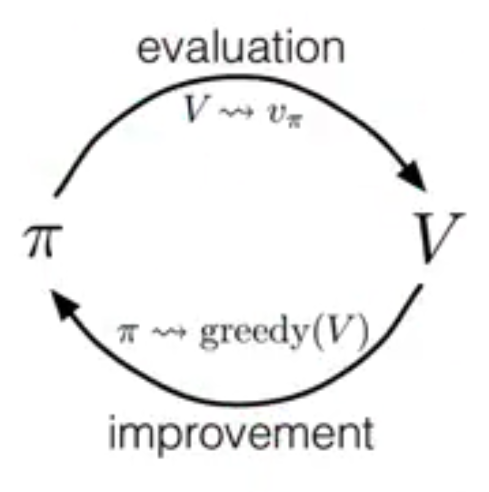

## Iterative Policy Evaluation

The Iterative Policy Evaluation is a Dynamic Programming algorithm that can be used to evaluate a Policy. It is based in an iterative version of the Bellman Equations over a model (it is a MDP).

This Notebook it is going to implement a basic example to evaluate this algorithm. The Environment is going to be very simple:

### Grid World

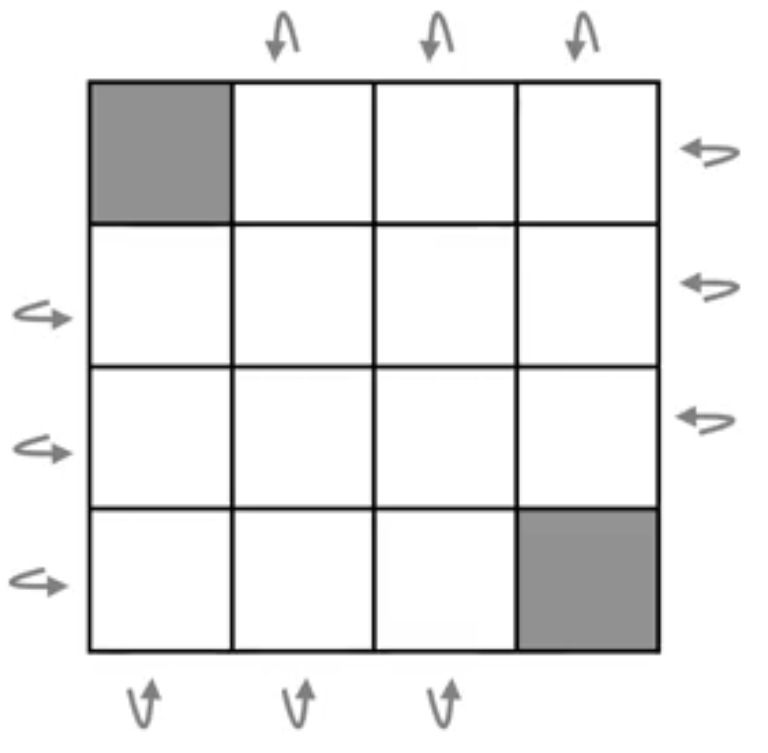

It is a NxN Grid World that is an episodic MVP with two terminal states:
* Left-top corner cell with +5 reward.
* Right-bottom corner cell with +10 reward.

Reward is -1 for every transition. 

The actions are: left, right, up, down in all cells.
If the actions moves the agent outside the grid, it will stay in the same state and the Reward will be -2.



### Packages
These are the packages used in this Notebook.

* **numpy:** Fundamental package for scientific computing with Python.
* **jdc:** Jupyter magic that allows defining classes over multiple jupyter notebook cells.
* **tqdm:** A package to display progress bar when running experiments.

In [1]:
!pip install jdc

In [2]:
import numpy as np
import jdc
from tqdm import tqdm

### Grid World Environment

Let's build the Environment: a NxN grid world where you can move in all directions and there are two terminal states:

* Left-top corner cell with +5 reward.
* Right-bottom corner cell with +10 reward.






Methods:
* **reset**: sets a random init state.
* **sample_action**: gets an action randomly selected based on the probabilities added as a parameter.

In [3]:
class GridWorld:

  def __init__(self, n: int):
    """
    Grid World initializations
    ----------
    n : int
        Number of rows and columns of the Grid World
    """
    self.n = n
    self.action_probs = [0.25, 0.25, 0.25, 0.25] # Default action probabilities

    # Terminal States
    self.tl_terminal = 0 # Top-left corner
    self.rb_terminal = (n*n)-1 # Bottom-right corner
    
    self.actions = ['up', 'down', 'left', 'right'] # Available actions
    
    # Initial Status
    self.current = None 
    self.previous = None
    
  def reset(self):
    """
    Reset Method - Starts in a state that is not terminal
    """
    self.current = np.random.randint(1, (self.n * self.n)-1)
    self.previous = None

    return self.current

  def sample_action(self):
    """
    Returns a sample action based on the action_probs.
    """
    return np.random.choice(self.actions, p=self.action_probs)

The **step** method is the one that the Agent calls once the Policy has decided the action to choose.

This method returns:
* The new State after action execution
* The reward obtained
* True/False if the new State is a terminal state or not.

In [4]:
%%add_to GridWorld

def step(self, action: str):
  """
  Performs a movement in the Grid World and gets the new State and Reward
  ------------
  action : str
    One of the following actions: up, down, left, right
  """
  self.current = self.move(action)
    
  return self.current, self.get_reward(), self.is_terminal_state()

Move is the internal method that applies the action in the environment following the specific rules of the Grid World.

In this case the movement in the NxN Grid World.

In [5]:
%%add_to GridWorld

def move(self, action: str):
  """
  Calculates the new State given a current State and an Action
  -----------
  action: str
    One of the following actions: up, down, left, right
  """
  self.previous = self.current

  if action not in self.actions:
    raise Exception(f"'{action}' is not a valid action!")

  if action == 'up':
    return self.current - self.n if self.current > self.n-1 else self.current
  elif action == 'down':
    return self.current + self.n if self.current < self.n * (self.n-1) else self.current
  elif action == 'left':
    return self.current - 1 if self.current % self.n != 0 else self.current
  elif action == 'right':
    return self.current + 1 if (self.current + 1) % self.n != 0 else self.current

These two internal methods are used to:
* getReward: returns the reward after the action is performed
* isTerminalState: returns if the new state is a terminal state or not

In [6]:
%%add_to GridWorld

def get_reward(self):
  """
  Gets Reward of the last movement
  """
  if self.is_terminal_state():
    return 5 if self.tl_terminal == self.current else 10 # If Terminal State returns different reward in each different corner 

  # Returns -2 if the movement was outbounds, -1 in all other cases
  return -2 if self.previous == self.current else -1

def is_terminal_state(self):
  return self.tl_terminal == self.current or self.rb_terminal == self.current

Additionaly for the iterative policy evaluation, we need to evaluate actions for each state so we need a method to force the current state.

In [7]:
 %%add_to GridWorld

 def set_state(self, state: int):
   """
   Forces change to a specific state
   ---------
   state : int
      New state id
   """
   self.current = state

### Testing the Environment

We can test with different values of N and execute a rollup using a Random Policy until the Agent arrives to a Terminal State.

In [8]:
def execute(n: str, verbose=False):
  """
  Creates the GridWorl and executes one episode
  -------------
  n: str
    Size of the Grid
  verbose: bool
    Write output to the notebook
  """
  world = GridWorld(n)

  first_state = world.reset()
  if verbose: print(f'Random First State: {first_state}')
  total_reward = 0
  steps = 0

  terminal = False
  while not terminal:
    action = world.sample_action() # Gets action randomly
    state, reward, terminal = world.step(action) # Executes action and gets reward and new state

    total_reward += reward
    steps += 1

    if verbose: print(f'Action: {action}, \tNew State: {state}, \tReward: {reward}, \tTerminal: {terminal}')

  if verbose: print(f"Total Reward: {total_reward} in {steps} steps")
  return steps, total_reward

In [11]:
execute(n=4, verbose=True)

Random First State: 8
Action: left, 	New State: 8, 	Reward: -2, 	Terminal: False
Action: left, 	New State: 8, 	Reward: -2, 	Terminal: False
Action: down, 	New State: 12, 	Reward: -1, 	Terminal: False
Action: right, 	New State: 13, 	Reward: -1, 	Terminal: False
Action: down, 	New State: 13, 	Reward: -2, 	Terminal: False
Action: left, 	New State: 12, 	Reward: -1, 	Terminal: False
Action: left, 	New State: 12, 	Reward: -2, 	Terminal: False
Action: left, 	New State: 12, 	Reward: -2, 	Terminal: False
Action: down, 	New State: 12, 	Reward: -2, 	Terminal: False
Action: up, 	New State: 8, 	Reward: -1, 	Terminal: False
Action: right, 	New State: 9, 	Reward: -1, 	Terminal: False
Action: up, 	New State: 5, 	Reward: -1, 	Terminal: False
Action: left, 	New State: 4, 	Reward: -1, 	Terminal: False
Action: up, 	New State: 0, 	Reward: 5, 	Terminal: True
Total Reward: -14 in 14 steps


(14, -14)

Let's get Average Total Reward and needed steps to compare with a better Policy

In [12]:
runs = 10000

reward = 0
steps = 0

for _ in tqdm(range(runs)):
  run_steps, run_reward = execute(n=4)
  reward += run_reward
  steps += run_steps

print("\n")
print(f"Average Reward: {reward/runs}")
print(f"Average Steps: {steps/runs}")  

100%|██████████| 10000/10000 [00:07<00:00, 1417.35it/s]



Average Reward: -13.9086
Average Steps: 18.4281


### Iterative Policy Evaluation

The algoritm calculates the matrix that includes the maximum function value for each state.

In [13]:
class IterativePolicyEvaluation:
  def __init__(self, n: int, theta: float, discount: float, policy: object, environment: object):
    '''
    Initialization 
    '''
    self.n = n # Size of the GridWorld
    self.theta = theta # Limit value for the delta between values of a state
    self.discount = discount # Discount from the previous values of a state
    
    self.V = None # Stores value function
    self.Vc = None # Stores the previous values of V

    self.policy = policy
    self.environment = environment

  def reset(self):
    '''
    Reset is executed at the begining of each episode.
    '''
    self.V = np.zeros((self.n * self.n, ))
    self.Vc = np.zeros((self.n * self.n, ))

In [14]:
%%add_to IterativePolicyEvaluation

def get_action(self):
  '''
  Gets the next action from the Policy
  '''
  return self.policy.get_action(self.environment)

**Iterative Policy Evaluation Execution**

The algorithm gets the maximum values for each state in an iterative way.

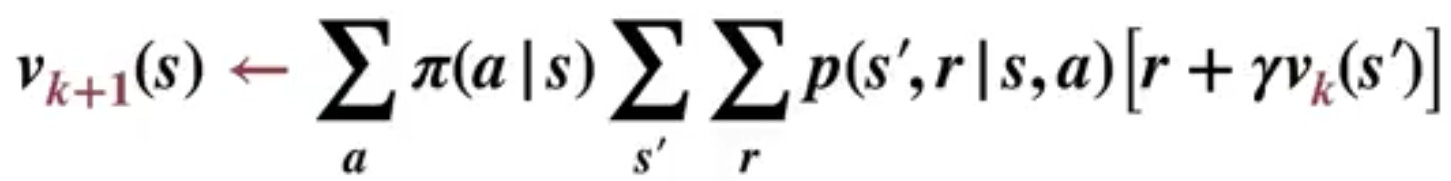

In [15]:
%%add_to IterativePolicyEvaluation

def eval(self):
  '''
  Evaluates the current policy calculating the function value for each state
  '''
  self.reset()
  self.environment.reset()

  end = False
  while not end:
    delta = 0

    for state in range(self.n * self.n):
      # Calculates the value for all posible actions in the state
      self.Vc[state] = np.sum([self.calc_value(self.environment, state, action) * self.environment.action_probs[self.environment.actions.index(action)] for action in self.environment.actions])
      # Gets the maximum difference between current and previous values
      delta = max(delta, abs(self.Vc[state] - self.V[state]))

    self.V = self.Vc
    self.Vc = np.zeros((self.n * self.n, ))

    # Only ends if the delta is lower than theta (small value)
    end = delta <= theta
 
  return self.V

In our case the next state when the Agent takes an action in the current state is deterministic. So the formula is a bit simpler. 

In [16]:
%%add_to IterativePolicyEvaluation

def calc_value(self, env: object, state: int, action: str):
  '''
  Calculates the function value of the state
  '''
  env.set_state(state)
  if env.is_terminal_state():
    return env.get_reward() # If it is a terminal state, the value is the reward

  new_state, reward, _ = env.step(action)
  
  return reward + self.discount * self.V[new_state]

### Testing the Iterative Policy Evaluation with the RandomPolicy

The algorithm is prepared to accept different policies. Let's start with a Random Policy.

In [17]:
class RandomPolicy:

  def get_action(self, environment):
    '''
    Gets randomly a new action from the available actions
    '''
    return self.environment.sample_action()

This function helps to print the Function Value in a "grid" mode.

In [18]:
def print_v(v, n: int):
  """
  Print Grid
  -----------
  v : np_array
    Array that stores the function value for each state.
  n : int
    Size of the Grid World
  """
  grid = ""
  for i, v in enumerate(v):
    grid = grid + f"{v:.2f}" + (f'\n' if (i + 1) % n == 0 else '\t')

  print(grid)

In [19]:
N = 4
theta = 0.0001
discount = 1

In [20]:
world = GridWorld(N)
policy = RandomPolicy()

v = IterativePolicyEvaluation(N, theta, discount, policy, world).eval()

print_v(v, N)

5.00	-3.31	-9.27	-11.50
-3.31	-6.65	-8.00	-7.73
-9.27	-8.00	-4.34	1.31
-11.50	-7.73	1.31	10.00



## Policy Iteration Algorithm

Before implementing the Policy Iteration Algorithm, let's prepare a new Policy class that could be update along time by the algorithmn.

This Policy has the same initial set of probabilities for each state. This should be changed by the Polity Iteration Algorithm 

In [21]:
class Policy:
  def __init__(self, state_actions_probs: list, n: int):
    '''
    Initializations
    ----------------
    state_actions_probs: list
      List with the initial probabilites for the 4 available actions
    n : int
      Size of the Grid World
    '''
    # Copies sames probabilities in all states   
    self.state_actions_probs = np.full((n*n, 4), state_actions_probs)

  def get_action(self, environment: object):
    '''
    Returns action in terms of probabilities of the actions for each state (improved each cycle)
    ------------
    environment : object
      Environment to get available actions
    '''

    return np.random.choice(environment.actions, p=self.state_actions_probs[environment.current])   

### Testing the Policy

Testing this Policy with the Grid World and getting the Function Value. Its behavior has to be the same than RandomPolicy. It will be improved by the Policy Iteration Algorithm

In [22]:
N = 4
theta = 0.001
discount = 1

In [23]:
world = GridWorld(n=N)
policy = Policy(np.array([0.25, 0.25, 0.25, 0.25]), N)

v = IterativePolicyEvaluation(N, theta, discount, policy, world).eval()

In [24]:
print_v(v, N)

5.00	-3.30	-9.25	-11.48
-3.30	-6.64	-7.98	-7.72
-9.25	-7.98	-4.33	1.32
-11.48	-7.72	1.32	10.00



### Implementing the Policy Iteration Algorithm

In [25]:
class PolicyIteration:
  def __init__(self, configuration: dict, environment: object, policy: object):
    '''
    Initialization
    ---------------
    configuration : dict
      Dictionary that includes configuration settings
    environment : object
      The Grid World in our case
    policy : object
      The policy that is going to be improved
    '''
    self.environment = environment
    self.policy = policy
    
    self.V = None

    self.N = configuration['N']
    self.theta = configuration['theta']
    self.discount = configuration['discount']

Policy Iteration performs an iterative Evaluation and Improvement of the Policy.

This first step is in charge of the Evaluation. We will use the allready created IterativePolicyEvaluation class for this.

In [26]:
%%add_to PolicyIteration

def policy_evaluation(self, N: int, theta: float, discount: float, policy: object, environment: object):
  '''
  Evaluates the policy. Returns the Function Value for all States
  '''
  return IterativePolicyEvaluation(N, theta, discount, policy, environment).eval()

To improve the Policy we select the actions that move to the State(s) that will provide the greater value.

In [27]:
%%add_to PolicyIteration

def policy_improvement(self, policy, V, N):
  '''
  Improves a Policy using the current Function Value.
  Returns the new version of the Policy and it has been updated or not.
  '''
  policy_stable = True # Used to check if the Policy has changed or not in this step
  
  for state in range(1, (N*N)-1):
    old_actions_probs = np.copy(policy.state_actions_probs[state])

    policy.state_actions_probs[state] = self.get_greedy_actions(state, V, N)

    if not np.array_equal(old_actions_probs, policy.state_actions_probs[state]):
      policy_stable = False

  print(f"The policy is stable: {policy_stable}.")
  return policy, policy_stable

In [28]:
%%add_to PolicyIteration

def get_greedy_actions(self, state, V, N):
  '''
  Returns action probabilities in order to move to the states that will provide the higher value
  '''
  state_action_values = self.get_action_values(V, state, N) # What are the value that we could get from current state

  max_action_value = max(state_action_values) # What is the higher value
  max_value_indices = [i for i, value in enumerate(state_action_values) if value == max_action_value] # Gets their indices

  # Prepares action probabilites for the ones with the higher value
  action_probs = np.zeros((4,))
  action_probs[max_value_indices] = 1 / (len(max_value_indices) if type(max_value_indices) is list else 1)
  
  return action_probs

In [29]:
%%add_to PolicyIteration

def get_action_values(self, V, state, N):
  '''
  Gets the values for each posible action from the current state
  '''
  up = V[state - N] if state > N-1 else V[state]
  down = V[state + N] if state < N * (N-1) else V[state]
  left = V[state - 1] if state % N != 0 else V[state]
  right = V[state + 1] if (state + 1) % N != 0 else V[state]

  return [up, down, left, right]

In [30]:
%%add_to PolicyIteration

def execute(self, verbose=False):
  policy_stable = False

  while not policy_stable:
    self.V = self.policy_evaluation(self.N, self.theta, self.discount, self.policy, self.environment)
    
    if verbose:
      print("Policy Value Function")
      print_v(self.V, self.N)
    
    self.policy, policy_stable = self.policy_improvement(self.policy, self.V, self.N)
    
    if verbose:
      print("Policy")
      print_policy(self.policy.state_actions_probs, self.N)

  return self.policy, self.V

This function helps to visualize a Policy

In [31]:
def print_policy(policy, n: int):
  '''
  Prints the Policy in a "grid" mode
  --------
  policy
    As an array
  n : int
    Size of the Grid World
  '''
  grid = ""
  actions = [u"\u2191", u"\u2193", u"\u2190", u"\u2192"]

  for i, state_policy in enumerate(policy):

    grid = grid + f"{''.join([actions[i] for i, value in enumerate(state_policy) if value != 0])}" + (f'\n' if (i + 1) % n == 0 else '\t')

  print(grid)  

In [32]:
configuration = {
  "N": N,
  "theta": 0.0001,
  "discount": 1
}

environment = GridWorld(configuration['N'])
policy = Policy(np.array([0.25, 0.25, 0.25, 0.25]), N)

policy, v = PolicyIteration(configuration, environment, policy).execute(verbose=True)

Policy Value Function
5.00	-3.30	-9.25	-11.48
-3.30	-6.64	-7.98	-7.72
-9.25	-7.98	-4.33	1.32
-11.48	-7.72	1.32	10.00

The policy is stable: False.
Policy
↑↓←→	←	←	↓
↑	↑←	↓	↓
↑	→	↓→	↓
→	→	→	↑↓←→

Policy Value Function
5.00	-3.30	-9.25	-11.48
-3.30	-6.64	-7.98	-7.72
-9.25	-7.98	-4.33	1.32
-11.48	-7.72	1.32	10.00

The policy is stable: True.
Policy
↑↓←→	←	←	↓
↑	↑←	↓	↓
↑	→	↓→	↓
→	→	→	↑↓←→



## Evaluating the new improved Policy

Let's get Average Total Reward and needed steps to compare with the previous one.

In [33]:
def execute_policy(world: object, policy: object, verbose=False):
  """
  Creates the GridWorld and executes one episode
  """
  first_state = world.reset()
  if verbose: print(f'Random First State: {first_state}')
  total_reward = 0
  steps = 0

  terminal = False
  while not terminal:
    action = policy.get_action(world) # Gets action randomly
    state, reward, terminal = world.step(action) # Executes action and gets reward and new state

    total_reward += reward
    steps += 1

    if verbose: print(f'Action: {action}, \tNew State: {state}, \tReward: {reward}, \tTerminal: {terminal}')

  if verbose: print(f"Total Reward: {total_reward} in {steps} steps")
  return steps, total_reward

In [34]:
execute_policy(environment, policy, verbose=True)

Random First State: 6
Action: down, 	New State: 10, 	Reward: -1, 	Terminal: False
Action: down, 	New State: 14, 	Reward: -1, 	Terminal: False
Action: right, 	New State: 15, 	Reward: 10, 	Terminal: True
Total Reward: 8 in 3 steps


(3, 8)

In [36]:
runs = 10000

reward = 0
steps = 0

for _ in tqdm(range(runs)):
  run_steps, run_reward = execute_policy(environment, policy, verbose=False)
  reward += run_reward
  steps += run_steps

print("\n")
print(f"Average Reward: {reward/runs}")
print(f"Average Steps: {steps/runs}")  

100%|██████████| 10000/10000 [00:01<00:00, 8819.18it/s]



Average Reward: 7.1997
Average Steps: 2.0058


## Conclusions

It is clear that there is a great improvement:


Policy|Avg. Reward|Avg. Steps
------|-----------|----------
Random Policy|-14.22|18.59
Improved Policy|7.19|2.00